## Analysis

1.The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude).The temperature is higher in the southern hemisphere than the northern hemisphere this time.

2.There is no relationship between humidity and latitude. While most of the cities across the world has humidity over 60%, there are few cities with humidity below 40%.

3.There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key
from citipy import citipy
output_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding (lat,lng) and cities
lat_lngs = []
cities = []

# To create a set of random lat and lng combinations
lats = np.random.uniform(low =-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm count
len(cities)


636

In [3]:
# Created dataframe with cities list and created columns to put the required data
weather_df = pd.DataFrame({"cities": cities})
weather_df['City'] = ""
weather_df['Cloudiness'] = ""
weather_df['Country'] =""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] =""
weather_df["Wind Speed"] =""


In [4]:
# get url for API calls with city name
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("------------------------")
counter = 1
Set = 1
for index, row in weather_df.iterrows():

    try:
        
        city = row['cities']
        response= requests.get(query_url + city).json()
        # Extracted data from openweather website and put in the datafram
        weather_df.loc[index, 'City'] = response["name"]
        weather_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        weather_df.loc[index, 'Country'] = response["sys"]["country"]
        weather_df.loc[index, 'Date'] = response["dt"]
        weather_df.loc[index, 'Humidity']  = response["main"]["humidity"]
        weather_df.loc[index, 'Lat'] = response["coord"]["lat"]
        weather_df.loc[index, 'Lng'] = response["coord"]["lon"]
        weather_df.loc[index, 'Max Temp'] = response["main"]["temp_max"]
        weather_df.loc[index, 'Wind Speed'] = response["wind"]["speed"]
        print(f"Processing Record {counter} of Set {Set} | {city}")
        counter += 1
        if counter == 50:
            Set+=1
            counter=0
    # To handle the error if the city is not found
    except:
        print("City not found. Skipping...")
        
        

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | akdepe
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | huilong
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | bouillante
Processing Record 8 of Set 1 | smoky lake
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | sayyan
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | hay river
Processing Record 13 of Set 1 | mayo
Processing Record 14 of Set 1 | nurlat
Processing Record 15 of Set 1 | haines junction
Processing Record 16 of Set 1 | chicama
Processing Record 17 of Set 1 | poum
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | lipin bor
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | brae
Processing Record 23 of Set 1 | tautira
Processing Record 24 of S

Processing Record 37 of Set 4 | santa lucia
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | waldshut-tiengen
Processing Record 40 of Set 4 | slave lake
City not found. Skipping...
Processing Record 41 of Set 4 | gizo
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | dolores
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | tura
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | kokopo
Processing Record 49 of Set 4 | cherskiy
Processing Record 0 of Set 5 | hotarele
City not found. Skipping...
Processing Record 1 of Set 5 | manono
Processing Record 2 of Set 5 | kungurtug
Processing Record 3 of Set 5 | san quintin
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | semey
Processing Record 8 of Set 5 | den helder
Processing Record 9 of Set 5 | hithadhoo
Processi

Processing Record 27 of Set 8 | nadbai
Processing Record 28 of Set 8 | mackenzie
Processing Record 29 of Set 8 | appingedam
Processing Record 30 of Set 8 | buluang
City not found. Skipping...
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | klyuchi
Processing Record 33 of Set 8 | hailar
City not found. Skipping...
Processing Record 34 of Set 8 | balabac
Processing Record 35 of Set 8 | mumford
Processing Record 36 of Set 8 | molina
Processing Record 37 of Set 8 | gravatai
Processing Record 38 of Set 8 | neftcala
Processing Record 39 of Set 8 | chumikan
Processing Record 40 of Set 8 | garden city
Processing Record 41 of Set 8 | plaeng yao
Processing Record 42 of Set 8 | dandong
Processing Record 43 of Set 8 | williston
Processing Record 44 of Set 8 | belen
Processing Record 45 of Set 8 | perez
Processing Record 46 of Set 8 | sitka
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 8 | houston
Processing Record 48 of Set 8 | we

Processing Record 12 of Set 12 | los llanos de aridane
Processing Record 13 of Set 12 | sergeyevka
City not found. Skipping...
Processing Record 14 of Set 12 | manta
Processing Record 15 of Set 12 | sampit
Processing Record 16 of Set 12 | arlit
Processing Record 17 of Set 12 | taitung
Processing Record 18 of Set 12 | kotelnikovo
Processing Record 19 of Set 12 | alexandria
Processing Record 20 of Set 12 | roebourne
Processing Record 21 of Set 12 | kutum
Processing Record 22 of Set 12 | kenora
Processing Record 23 of Set 12 | marietta
Processing Record 24 of Set 12 | lopatyn
Processing Record 25 of Set 12 | sainte-rose
Processing Record 26 of Set 12 | tanete
Processing Record 27 of Set 12 | prince rupert


In [8]:
weather_df= weather_df.drop(['cities'], axis=1)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Akdepe,90,TM,1548923400,79,42.05,59.39,30.2,6.93
1,Barrow,0,AR,1548925024,91,-38.31,-60.23,53.1,5.5
2,Lavrentiya,0,RU,1548925103,83,65.58,-170.99,13.32,23.17
3,Port Alfred,92,ZA,1548924838,99,-33.59,26.89,70.56,7.63
4,Huilong,20,CN,1548925309,90,28.89,110.18,41.13,3.71


In [9]:
# Save the weather data file as csv in output data folder
weather_df.to_csv("output_data/cities.csv")

In [2]:
# Cleaning the data
weather_data = pd.read_csv("output_data/cities.csv")
weather_data = weather_data.drop(['Unnamed: 0'], axis = 1)
weather_data = weather_data.dropna()
weather_data.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

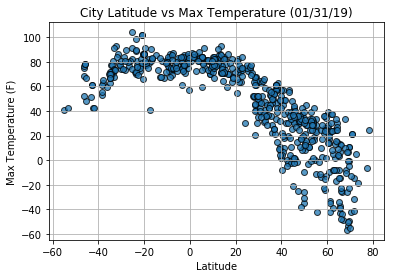

In [3]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'], alpha= 0.75, edgecolors='k')
plt.title("City Latitude vs Max Temperature (01/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/LatVsTemp")

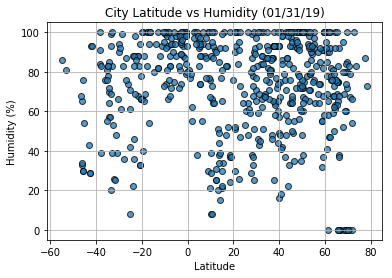

In [4]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'], alpha= 0.75, edgecolors='k')
plt.title("City Latitude vs Humidity (01/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/LatVsHum")

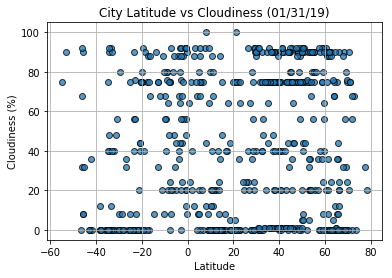

In [5]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'], alpha= 0.75, edgecolors='k')
plt.title("City Latitude vs Cloudiness (01/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/LatVsCloud")

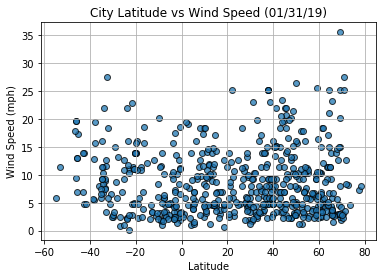

In [6]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'], alpha= 0.75, edgecolors='k')
plt.title("City Latitude vs Wind Speed (01/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/LatVsWind")